# Overview of Notebook

The following notebook will display the target beer label. Afterwards, the notebook will display images of labels that the deep learning one shot system selects as being fraudulent. Then the notebook will display images of labels that the system selects as being non-fradulent.

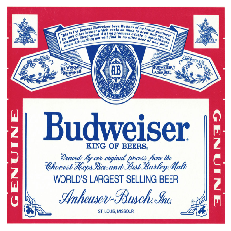

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
#import tflearn.datasets.oxflower17 as oxflower17
import tensorflow as tf
import numpy as np


root_dir = '/Users/jkim/tmp/ML_FraudDetections-Development/'
np.random.seed(1000)
img_shape = (224, 224, 3)
l2_reg = 0
alexnet = Sequential()
alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape, padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2 
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

import cv2
import matplotlib.pyplot as plt

from PIL import Image
#x, y = oxflower17.load_data(one_hot=True)


x = np.zeros((2, 224, 224, 3))
subject01 = Image.open(root_dir + 'TTB/label_fraud/beer_label_fraud/Bud_Label.png')
subject02 = Image.open(root_dir + 'TTB/label_fraud/beer_label_fraud/images/Bud_Light_Label.png')

subject01 = subject01.convert('RGB')
subject02 = subject02.convert('RGB')
subj01 = subject01.resize((224, 224))
subj02 = subject02.resize((224, 224))
plt.imshow(subj01)
plt.axis('off')
plt.show()
#subj02.show()
subj01_a = np.array(subj01)
subj02_a = np.array(subj02)


x[0] = subj01_a
x[1] = subj02_a
x_out_1 = alexnet.predict(x[0:2])
x_out_1_r = np.ravel(x_out_1[0])

#x[0] = subj02_a
#x_out_2 = alexnet.predict(x[0:1])
#print(str(x_out_1[1].shape))
#x_out_2_eig = tf.linalg.eigh( x_out_1[1], name=None)
x_out_2_r = np.ravel(x_out_1[1])

#print(str(x_out_2.max()))
be_l, hist_l = np.histogram(x_out_1_r, bins=100000, range=[0.0, 250.0], density = True)
#print(str(x_out_1.max()))
#(str(be_l))
cor01 = np.dot(be_l[:], be_l[:])

be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 250.0], density = True)
#print(str(be_h))
cor02 = np.dot(be_h[:], be_l[:])

#print('cor01 = ' + str(cor01) + ' cor02 = ' + str(cor02))




# Target Beer Label

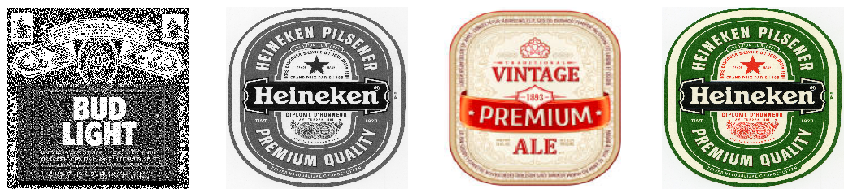

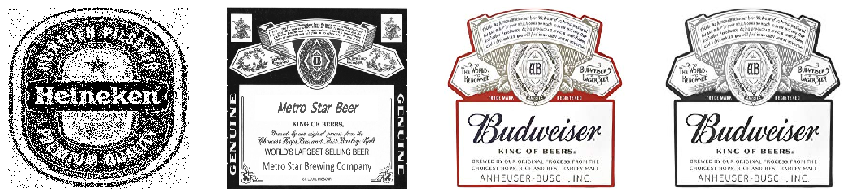

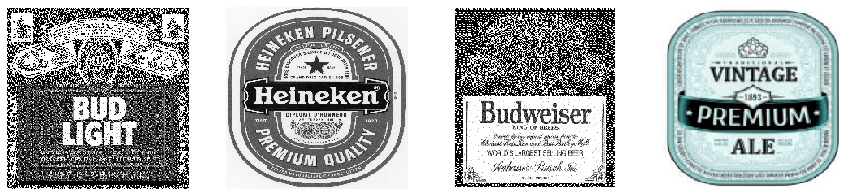

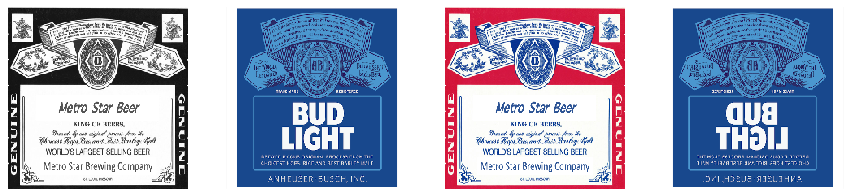

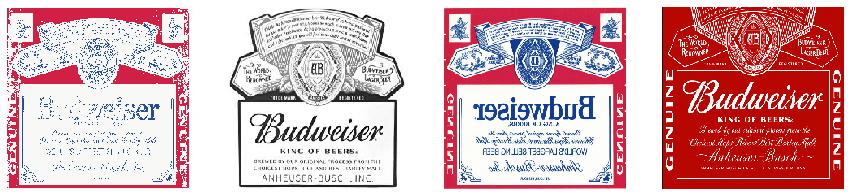

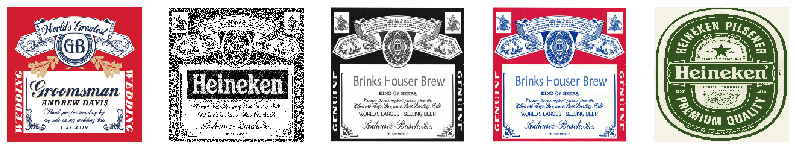

In [7]:
import cv2
import matplotlib.pyplot as plt

from PIL import Image
import os

mypath = root_dir + 'TTB/label_fraud/beer_label_fraud/images/'

f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    f.append(filenames)
    break
    
#print(f[0])
similar_diff = 0.0105*cor01
index = 0
img_list = []
for fn in f[0]:
#    print(mypath + fn)
    subject02 = Image.open(mypath + fn)
    subject02 = subject02.convert('RGB')
    subj02 = subject02.resize((224, 224))
    subj02_a = np.array(subj02)
  #  save_0 = subj02_a[:,:,0]
 #   save_1 = subj02_a[:,:,1]
#    print((str(subj02_a.shape)) + ' ' + str(save_1.shape))
 #   subj02_a[:,:,0] = save_1
  #  subj02_a[:,:,1] = save_0
    x[0] = subj02_a
 #   cv2.imwrite(mypath+'test' + str(index) + '.png', subj02_a)
    index += 1
 #   x_out_2 = alexnet.predict(x[0:1])
 #   x_out_2_r = np.ravel(x_out_2[0])
 #   be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 50.0], density = True)
 #   cor02 = np.dot(be_h[:], be_l[:])
 #   diff = np.abs(cor02-cor01)
#    print(str(cor02) + 'diff = ' + str(diff) + ' similar_diff = '+ str(similar_diff) + ' ' + fn)
 #   if(diff < similar_diff):
    img_list.append(subj02_a)
    

#print(str(len(img_list)))
(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[0])
a2[0].axis('off')

a2[1].imshow(img_list[1])
a2[1].axis('off')

a2[2].imshow(img_list[2])
a2[2].axis('off')

a2[3].imshow(img_list[3])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[4])
a2[0].axis('off')

a2[1].imshow(img_list[5])
a2[1].axis('off')

a2[2].imshow(img_list[6])
a2[2].axis('off')

a2[3].imshow(img_list[7])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[8])
a2[0].axis('off')

a2[1].imshow(img_list[9])
a2[1].axis('off')

a2[2].imshow(img_list[10])
a2[2].axis('off')

a2[3].imshow(img_list[11])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[12])
a2[0].axis('off')

a2[1].imshow(img_list[13])
a2[1].axis('off')

a2[2].imshow(img_list[14])
a2[2].axis('off')

a2[3].imshow(img_list[15])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,4, figsize=(15,15))
a2[0].imshow(img_list[16])
a2[0].axis('off')

a2[1].imshow(img_list[17])
a2[1].axis('off')

a2[2].imshow(img_list[18])
a2[2].axis('off')

a2[3].imshow(img_list[19])
a2[3].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,5, figsize=(14,14))
a2[0].imshow(img_list[20])
a2[0].axis('off')

a2[1].imshow(img_list[21])
a2[1].axis('off')

a2[2].imshow(img_list[22])
a2[2].axis('off')

a2[3].imshow(img_list[23])
a2[3].axis('off')

a2[4].imshow(img_list[24])
a2[4].axis('off')
plt.show()

# Test Beer Labels

10


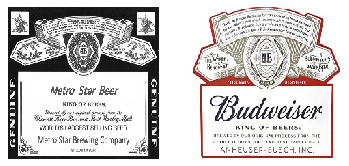

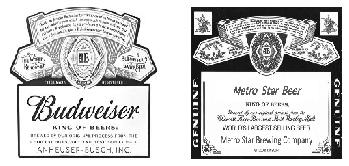

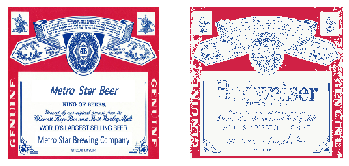

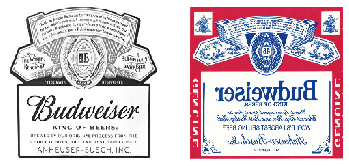

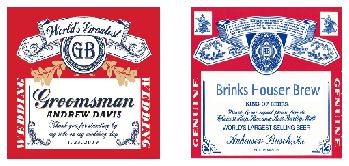

In [8]:
from os import walk
import cv2

mypath = root_dir + 'TTB/label_fraud/beer_label_fraud/images/'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.append(filenames)
    break
    
#print(f[0])
similar_diff = 0.03*cor01
index = 0
img_list = []
for fn in f[0]:
#    print(mypath + fn)
    subject02 = Image.open(mypath + fn)
    subject02 = subject02.convert('RGB')
    subj02 = subject02.resize((224, 224))
    subj02_a = np.array(subj02)
    save_0 = subj02_a[:,:,0]
    save_1 = subj02_a[:,:,1]
 #   print((str(subj02_a.shape)) + ' ' + str(save_1.shape))
 #   subj02_a[:,:,0] = save_1
 #   subj02_a[:,:,1] = save_0
    x[0] = subj02_a
 #   cv2.imwrite(mypath+'test' + str(index) + '.png', subj02_a)
    index += 1
    x_out_2 = alexnet.predict(x[0:1])
    x_out_2_r = np.ravel(x_out_2[0])
    be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 250.0], density = True)
    cor02 = np.dot(be_h[:], be_l[:])
 #   print(str(cor02))
    diff = np.abs(cor02-cor01)
    if(diff < similar_diff):
        img_list.append(subj02_a)

print(str(len(img_list)))
(a1, a2) = plt.subplots(1,2)
a2[0].imshow(img_list[0])
a2[0].axis('off')

a2[1].imshow(img_list[1])
a2[1].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,2)
a2[0].imshow(img_list[2])
a2[0].axis('off')

a2[1].imshow(img_list[3])
a2[1].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,2)
a2[0].imshow(img_list[4])
a2[0].axis('off')

a2[1].imshow(img_list[5])
a2[1].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,2)
a2[0].imshow(img_list[6])
a2[0].axis('off')

a2[1].imshow(img_list[7])
a2[1].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,2)
a2[0].imshow(img_list[8])
a2[0].axis('off')

a2[1].imshow(img_list[9])
a2[1].axis('off')
plt.show()



# Test Beer Labels Selected as Fraudulent

15


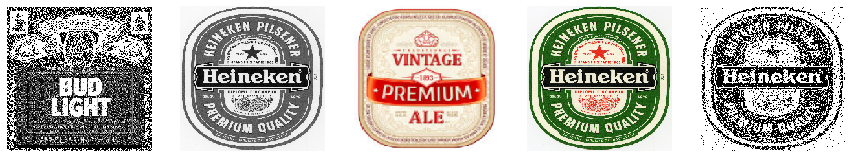

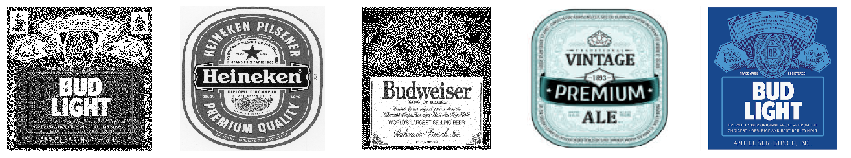

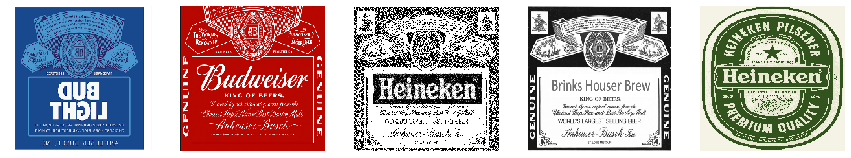

In [9]:
from os import walk
import cv2

mypath = root_dir + 'TTB/label_fraud/beer_label_fraud/images/'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.append(filenames)
    break
    
#print(f[0])
similar_diff = 0.03*cor01
index = 0
img_list = []
for fn in f[0]:
#    print(mypath + fn)
    subject02 = Image.open(mypath + fn)
    subject02 = subject02.convert('RGB')
    subj02 = subject02.resize((224, 224))
    subj02_a = np.array(subj02)
    save_0 = subj02_a[:,:,0]
    save_1 = subj02_a[:,:,1]
 #   print((str(subj02_a.shape)) + ' ' + str(save_1.shape))
 #   subj02_a[:,:,0] = save_1
 #   subj02_a[:,:,1] = save_0
    x[0] = subj02_a
 #   cv2.imwrite(mypath+'test' + str(index) + '.png', subj02_a)
    index = index + 1
    x_out_2 = alexnet.predict(x[0:1])
    x_out_2_r = np.ravel(x_out_2[0])
    be_h, hist_h = np.histogram(x_out_2_r, bins=100000, range=[0.0, 250.0], density = True)
    cor02 = np.dot(be_h[:], be_l[:])
 #   print(str(cor02))
    diff = np.abs(cor02-cor01)
    if(diff > similar_diff):
        img_list.append(subj02_a)
#        plt.imshow(subj02_a)
#        plt.axis('off')
#        plt.show()
print(str(len(img_list)))
(a1, a2) = plt.subplots(1,5, figsize=(15,15))
a2[0].imshow(img_list[0])
a2[0].axis('off')

a2[1].imshow(img_list[1])
a2[1].axis('off')

a2[2].imshow(img_list[2])
a2[2].axis('off')

a2[3].imshow(img_list[3])
a2[3].axis('off')

a2[4].imshow(img_list[4])
a2[4].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,5, figsize=(15,15))
a2[0].imshow(img_list[5])
a2[0].axis('off')

a2[1].imshow(img_list[6])
a2[1].axis('off')

a2[2].imshow(img_list[7])
a2[2].axis('off')

a2[3].imshow(img_list[8])
a2[3].axis('off')

a2[4].imshow(img_list[9])
a2[4].axis('off')
plt.show()

(a1, a2) = plt.subplots(1,5, figsize=(15,15))
a2[0].imshow(img_list[10])
a2[0].axis('off')

a2[1].imshow(img_list[11])
a2[1].axis('off')

a2[2].imshow(img_list[12])
a2[2].axis('off')

a2[3].imshow(img_list[13])
a2[3].axis('off')

a2[4].imshow(img_list[14])
a2[4].axis('off')
plt.show()





# Test Beer Labels Selected as Non-Fraudulent